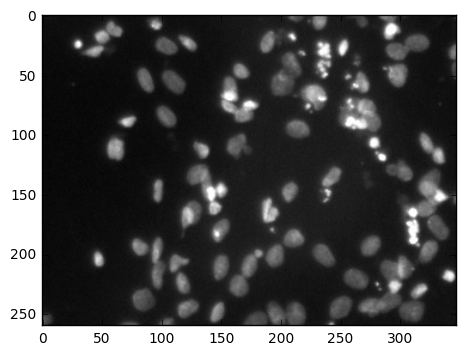

In [1]:
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import glob

directory = '/Users/Gale/Documents/DATA_nuclei/stage1_train/'
path = glob.glob(directory + "*/images/*.png")

# fluorescent example
img_fl = Image.open(path[11])
imshow(np.asarray(img_fl))
plt.show()

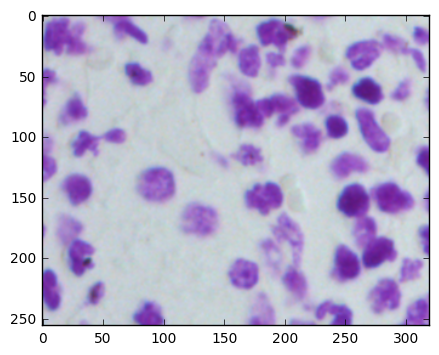

In [2]:
# staining example
img_st = Image.open(path[3])
imshow(np.asarray(img_st))
plt.show()

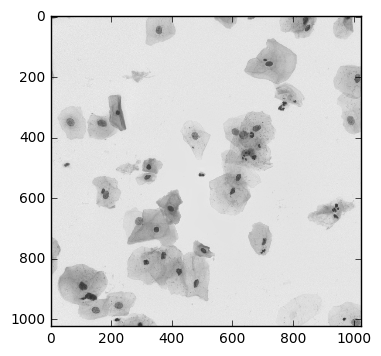

In [3]:
# brightfield example
img_br = Image.open(path[379])
imshow(np.asarray(img_br))
plt.show()

In [4]:
# clustering by:

# dominant image colours

# mean value for each colour channel? - is there a point of adding this? maybe, but it can make it harder to 
# distinguish between images (if, for example they are both really dark) BUT it is the same with the dominant colours...

# size of image? - no, that is too obvious and might influence the result too much (so that we are not sure of the 
# colours idea is bad or good, because it places too much weight on the size)

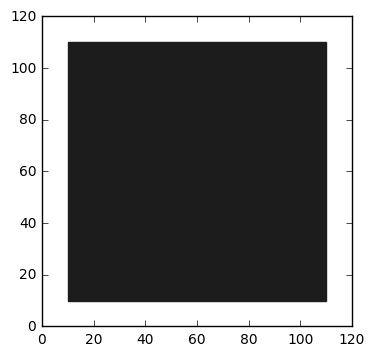

In [5]:
# Let's test the dominant colour theory // "grab the colour palette from an image" theory
# from github.com/fengsp/color-thief-py

from colorthief import ColorThief

# F L U O R E S C E N T
color_thief = ColorThief(path[11])
# let's try the highest quality and see how much time it would take
dominant_color = color_thief.get_color(quality = 1)

r = dominant_color[0]
r = r/255
g = dominant_color[1]
g = g/255
b = dominant_color[2]
b = b/255

plt.axes()

rectangle = plt.Rectangle((10, 10), 100, 100, fc = ([r, g, b]), color = ([r, g, b]))
plt.gca().add_patch(rectangle)

plt.axis('scaled')
plt.show()

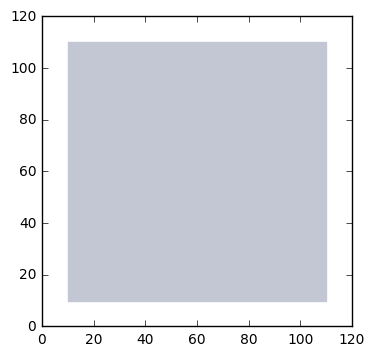

In [6]:
# S T A I N I N G
color_thief = ColorThief(path[3])
dominant_color = color_thief.get_color(quality = 1)

r = dominant_color[0]
r = r/255
g = dominant_color[1]
g = g/255
b = dominant_color[2]
b = b/255

plt.axes()

rectangle = plt.Rectangle((10, 10), 100, 100, fc = ([r, g, b]), color = ([r, g, b]))
plt.gca().add_patch(rectangle)

plt.axis('scaled')
plt.show()

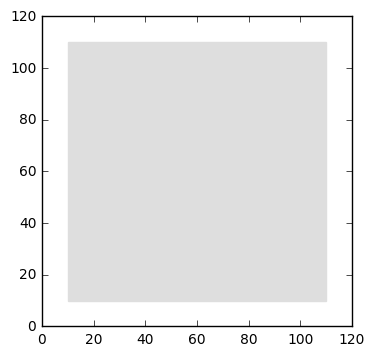

In [7]:
# B R I G H T F I E L D
color_thief = ColorThief(path[379])
dominant_color = color_thief.get_color(quality = 1)

r = dominant_color[0]
r = r/255
g = dominant_color[1]
g = g/255
b = dominant_color[2]
b = b/255

plt.axes()

rectangle = plt.Rectangle((10, 10), 100, 100, fc = ([r, g, b]), color = ([r, g, b]))
plt.gca().add_patch(rectangle)

plt.axis('scaled')
plt.show()

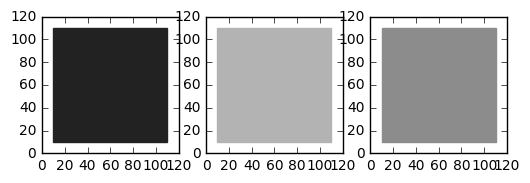

In [97]:
# palette -- top three dominating colours

# F L U O R E S C E N T
color_thief = ColorThief(path[11])

palette = color_thief.get_palette(color_count = 3, quality = 1)

for i in range(3):
    
    plt.subplot(1, 3, (i+1))
    
    r = palette[i][0]
    r = r/255
    g = palette[i][1]
    g = g/255
    b = palette[i][2]
    b = b/255
    
    rectangle = plt.Rectangle((10, 10), 100, 100, fc = ([r, g, b]), color = ([r, g, b]))
    plt.gca().add_patch(rectangle)
    
    plt.axis('scaled')
    
plt.show()

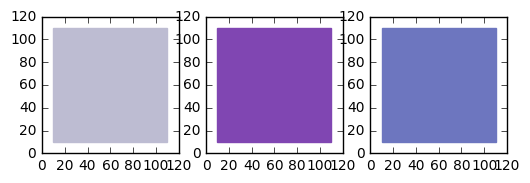

In [96]:
# S T A I N I N G
color_thief = ColorThief(path[3])

palette = color_thief.get_palette(color_count = 3, quality = 1)

for i in range(3):
    
    plt.subplot(1, 3, (i+1))
    
    r = palette[i][0]
    r = r/255
    g = palette[i][1]
    g = g/255
    b = palette[i][2]
    b = b/255
    
    rectangle = plt.Rectangle((10, 10), 100, 100, fc = ([r, g, b]), color = ([r, g, b]))
    plt.gca().add_patch(rectangle)
    
    plt.axis('scaled')
    
plt.show()

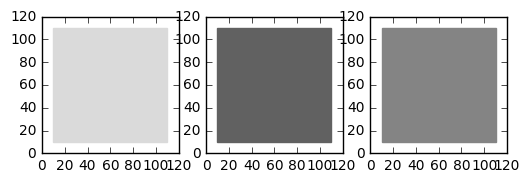

In [95]:
# B R I G H T F I E L D
color_thief = ColorThief(path[379])

palette = color_thief.get_palette(color_count = 3, quality = 1)

for i in range(3):
    
    plt.subplot(1, 3, (i+1))
    
    r = palette[i][0]
    r = r/255
    g = palette[i][1]
    g = g/255
    b = palette[i][2]
    b = b/255
    
    rectangle = plt.Rectangle((10, 10), 100, 100, fc = ([r, g, b]), color = ([r, g, b]))
    plt.gca().add_patch(rectangle)
    
    plt.axis('scaled')
    
plt.show()

In [32]:
# # input data would be the three colour palette from each image
# # save input data into a file 
# # why? too long to calculate each time
# 
# from colorthief import ColorThief
# 
# X = np.empty((0, 9))
# 
# for current_path in path:
#     color_thief = ColorThief(current_path)
#     palette = color_thief.get_palette(color_count = 3, quality = 1)
#     newrow = [palette[0][0], palette[0][1], palette[0][2], palette[1][0], palette[1][1], palette[1][2], palette[2][0], palette[2][1], palette[2][2]] 
#     X = np.vstack([X, newrow])
# 
# np.save('/Users/Gale/Documents/DataScienceBowl2018/X.npy', X)

In [33]:
from sklearn.cluster import KMeans 

# 3 types of images in the training set
# reminder: 4 image types in test set
kmeans = KMeans(n_clusters = 3)

# we have 8040 palettes (training images)
X = np.load('/Users/Gale/Documents/DataScienceBowl2018/X.npy')

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)